In [474]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

In [475]:
test_path = r"P:\MessageClassifier\data\dataset_test.tsv"
train_path = r"P:\MessageClassifier\data\dataset_train.tsv"

In [476]:
train_df = pd.read_csv(train_path, sep='\t')
test_df = pd.read_csv(test_path, sep='\t')

In [477]:
train_df = shuffle(train_df, random_state=42)
train_df.reset_index(drop=True, inplace=True)
test_df = shuffle(test_df, random_state=42)
test_df.reset_index(drop=True, inplace=True)

In [478]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6189 entries, 0 to 6188
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   message_text  6189 non-null   object
 1   message_type  6189 non-null   object
dtypes: object(2)
memory usage: 96.8+ KB


In [479]:
train_df

,message_text,message_type
0,ги распологается где,loc
1,распологается где академическая стипендия,finassist
2,цена повторного курса стоять,pay
3,а как заплатить комнату в общежитии плиз!,dorm
4,можно узнать где что находится пожалуйста,loc
...,...,...
6184,пятница расписание у группы 21388,schedule
6185,где сейчас Демиденко Г.В.,schedule
6186,расписание для Горбуль Н.Г.,schedule
6187,как найти Горчаков В.Н.,schedule


In [480]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   message_text  419 non-null    object
 1   message_type  418 non-null    object
dtypes: object(2)
memory usage: 6.7+ KB


In [481]:
test_df

,message_text,message_type
0,отыскать деканат фф,loc
1,расположен где центр математический,loc
2,как мне заказать социалка,finassist
3,расписание Ильичев Л.В.,schedule
4,расписание у 196618 группы среда,schedule
...,...,...
414,общежитие кошка иметь,dorm
415,зал цввр как получить,events
416,расположен где кафетерий корпус административн...,loc
417,расписание группа 193158,schedule


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'loc'),
  Text(1, 0, 'finassist'),
  Text(2, 0, 'pay'),
  Text(3, 0, 'dorm'),
  Text(4, 0, 'schedule'),
  Text(5, 0, 'military'),
  Text(6, 0, 'events'),
  Text(7, 0, 'statement_general'),
  Text(8, 0, 'holidays'),
  Text(9, 0, 'grade')])

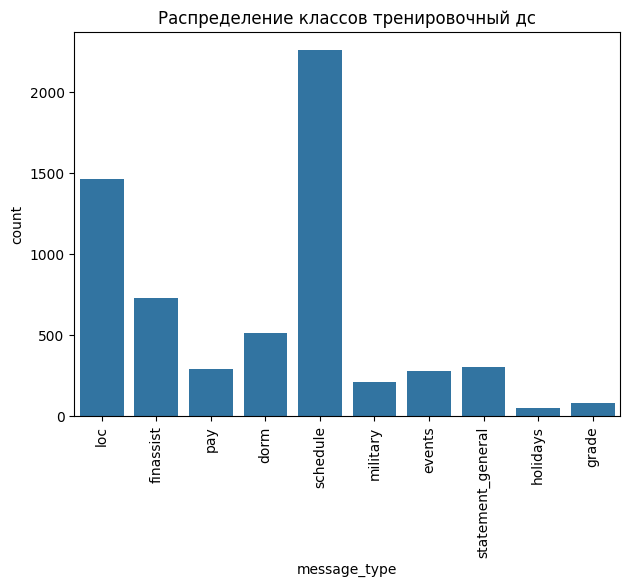

In [482]:
plt.figure
sns.countplot(data = train_df, x = 'message_type')
plt.title("Распределение классов тренировочный дс")
plt.tight_layout()
plt.xticks(rotation=90) 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'loc'),
  Text(1, 0, 'finassist'),
  Text(2, 0, 'schedule'),
  Text(3, 0, 'dorm'),
  Text(4, 0, 'statement_general'),
  Text(5, 0, 'events'),
  Text(6, 0, 'pay'),
  Text(7, 0, 'grade'),
  Text(8, 0, 'military'),
  Text(9, 0, 'holidays')])

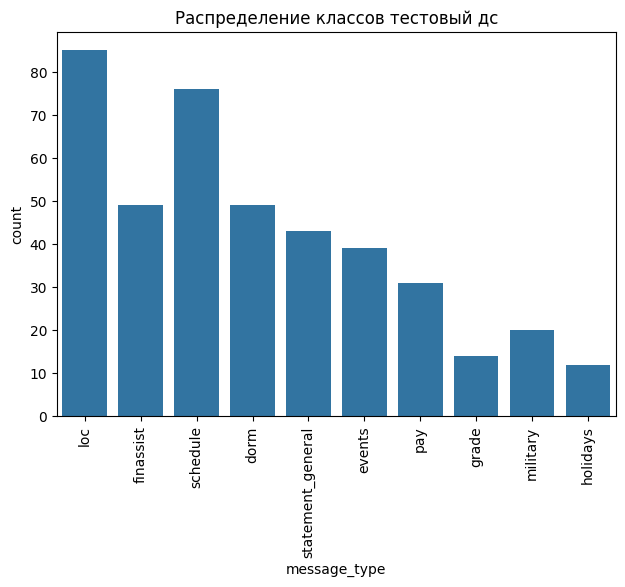

In [483]:
plt.figure
sns.countplot(data = test_df, x = 'message_type')
plt.title("Распределение классов тестовый дс")
plt.tight_layout()
plt.xticks(rotation=90) 

## Text preprocess

In [484]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import spacy
import sklearn
import pymorphy3
from pymorphy3 import MorphAnalyzer
import string
import re
from collections import defaultdict
#import gensim
import matplotlib_inline
import matplotlib.pyplot as plt

import string

import warnings
warnings.filterwarnings('ignore')

In [485]:
nltk.download('stopwords')
nltk.download('punkt')
rus = "russian"
morph = MorphAnalyzer()
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [486]:
def RemoveNotAlpha(text):
    return ''.join(i if i.isalpha() else ' ' for i in text)

def MorphyPreprocess(text, stopwords):
    text = RemoveNotAlpha(text)
    text = text.lower()
    sentences = sent_tokenize(text, language=rus)
    all_words = []
    for sent in sentences:
        words = word_tokenize(sent, language=rus)
        for w in words:
            if w in stopwords:
                all_words.append("")
            else:
                all_words.append(morph.normal_forms(w)[0])
    if len(all_words) >= 1:
        return ' '.join(all_words)
    else:
        return None

In [487]:
labels_names = train_df['message_type'].unique()
labels_names

array(['loc', 'finassist', 'pay', 'dorm', 'schedule', 'military',
       'events', 'statement_general', 'holidays', 'grade'], dtype=object)

In [488]:
#'statement_general' - 0 Вопросы по справкам
#'dorm' - 1 Вопросы по общежитию
#'events' - 2 Вопросы по мероприятиям
#'finassist' - 3 Финансовые вопросы
#'grade' - 4 Вопросы о оценках
#'loc' - 5 Вопросы о местоположении
#'military' - 6 Вопросы о военной кафедре
#'holidays' - 7 Вопросы о каникулах/выходных
#'pay' - 8 - Вопросы об оплате
#'schedule' - 9 - Вопросы о расписании
LabelDict = {
    0: 'statement_general',
    1: 'dorm',
    2: 'events',
    3: 'finassist',
    4: 'grade',
    5: 'loc',
    6: 'military',
    7: 'holidays',
    8: 'pay',
    9: 'schedule',
}
ReplaceDict = {
    "statement_general": 0,
    "dorm": 1,
    "events": 2,
    "finassist": 3,
    "grade": 4,
    "loc": 5,
    "military": 6,
    "holidays": 7,
    "pay": 8,
    "schedule": 9,
}

In [489]:
train_df["message_type"] = train_df["message_type"].replace(ReplaceDict)
test_df["message_type"] = test_df["message_type"].replace(ReplaceDict)

In [490]:
train_df

,message_text,message_type
0,ги распологается где,5
1,распологается где академическая стипендия,3
2,цена повторного курса стоять,8
3,а как заплатить комнату в общежитии плиз!,1
4,можно узнать где что находится пожалуйста,5
...,...,...
6184,пятница расписание у группы 21388,9
6185,где сейчас Демиденко Г.В.,9
6186,расписание для Горбуль Н.Г.,9
6187,как найти Горчаков В.Н.,9


In [491]:
sw = stopwords.words(rus)
sw += ['ммф']

In [492]:
# Обработка текста отдельно, данные на тренировку отдельно от тестовых
message_texts_train = [MorphyPreprocess(text, sw) for text in train_df['message_text']]
message_types_train = [label for label in train_df['message_type']]

message_texts_test = [MorphyPreprocess(text, sw) for text in test_df['message_text']]
message_types_test = [label for label in test_df['message_type']]

# Создание DataFrame для тренировочных данных
preprocessed_train = pd.DataFrame({
    'message_text': message_texts_train,
    'message_type': message_types_train
})

# Создание DataFrame для тестовых данных
preprocessed_test = pd.DataFrame({
    'message_text': message_texts_test,
    'message_type': message_types_test
})

In [493]:
preprocessed_train['message_text'] = preprocessed_train['message_text'].astype("string")
preprocessed_test['message_text'] = preprocessed_test['message_text'].astype("string")

In [494]:
preprocessed_train = preprocessed_train.dropna()
preprocessed_test = preprocessed_test.dropna()

In [495]:
preprocessed_train.head()

,message_text,message_type
0,ги распологаться,5
1,распологаться академический стипендия,3
2,цена повторный курс стоять,8
3,заплатить комната общежитие плиз,1
4,узнать находиться пожалуйста,5


In [496]:
preprocessed_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6182 entries, 0 to 6188
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   message_text  6182 non-null   string
 1   message_type  6182 non-null   int64 
dtypes: int64(1), string(1)
memory usage: 144.9 KB


## FastText classifier

In [497]:
#Установка FastText
%pip install fasttext-wheel


Note: you may need to restart the kernel to use updated packages.


In [498]:
# Подготовка данных для FastText 
labeled_fast_text_path = r"P:\MessageClassifier\fast_text_prepare_data\labeled_data.txt"
with open(labeled_fast_text_path, "w") as f:
  for label, text in zip(preprocessed_train['message_type'],preprocessed_train['message_text']):
    f.write("__label__" + str(label) + ' ' + text + '\n')

In [499]:
# Функция для векторизации текста
def vectorize_text(text):
    return model.get_sentence_vector(text)

In [500]:
import fasttext

# Параметры обучения
params = {
    'lr': 0.1, # скорость обучения
    'epoch': 25, # количество эпох
    'dim': 100, # размер эмбеддинга
    'ws': 5, # размер окна для обучения слов
    'minCount': 1, # минимальное количество вхождений слова для его учета
    'neg': 5, # количество отрицательных примеров
    'loss': 'ns', # функция потерь (например, 'ns' для нагрузки на обучение слов)
    'bucket': 2000000, # максимальное количество слов в одном контексте
    'minn': 3, # минимальная длина n-граммы
    'maxn': 6, # максимальная длина n-граммы
    'thread': 4, # количество потоков для обучения
}

model = fasttext.train_supervised(labeled_fast_text_path, **params)

In [501]:
preprocessed_train['vector'] = preprocessed_train['message_text'].apply(vectorize_text)
preprocessed_test['vector'] = preprocessed_test['message_text'].apply(vectorize_text)

In [502]:
train_vector_df = pd.DataFrame(preprocessed_train['vector'].tolist())

train_vector_df['message_type'] = preprocessed_train['message_type']

train_vector_df = train_vector_df.dropna(subset=['message_type'])

train_vector_df['message_type'] = train_vector_df['message_type'].astype('int')

preprocessed_train.drop(columns=['vector'], inplace=True)

In [503]:
test_vector_df = pd.DataFrame(preprocessed_test['vector'].tolist())

test_vector_df['message_type'] = preprocessed_test['message_type']

test_vector_df = test_vector_df.dropna(subset=['message_type'])

test_vector_df['message_type'] = test_vector_df['message_type'].astype('int')

preprocessed_test.drop(columns=['vector'], inplace=True)

In [504]:
train_vector_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,message_type
0,-0.027406,0.017149,-0.015944,-0.010484,0.105968,0.047186,0.034813,-0.003110,0.049688,0.074121,...,-0.013128,0.099046,-0.026750,0.067584,-0.040866,0.032186,0.079379,0.003720,-0.022744,5
1,-0.025833,0.078484,-0.127549,0.045529,0.123269,0.072394,0.116073,0.008110,0.078181,-0.077034,...,-0.030502,0.201431,-0.014100,0.061264,-0.009916,-0.075042,0.147678,0.005506,0.063508,3
2,0.002835,0.034707,-0.123275,0.134230,0.054466,0.092474,0.092525,-0.149820,0.070389,0.137900,...,-0.085437,0.013193,0.050543,-0.058914,-0.092188,-0.118350,0.044095,0.049972,-0.048228,8
3,-0.098815,-0.000641,-0.208933,0.241029,0.106610,0.072126,0.028210,0.082677,0.069097,0.128523,...,-0.270938,0.052798,-0.178382,0.160078,-0.305476,-0.082559,-0.049889,-0.122813,0.058177,1
4,-0.021649,0.010593,-0.033381,-0.000978,0.093444,0.034417,0.014260,0.003825,0.050089,0.046905,...,-0.018376,0.060141,-0.043786,0.038216,-0.041257,0.008665,0.058079,0.002326,-0.020342,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6177,-0.161283,0.192472,-0.049268,-0.092219,0.020747,-0.192373,0.157863,-0.019709,0.193286,0.438133,...,-0.225756,0.099952,-0.307359,0.081791,-0.121721,0.257246,0.233719,-0.380775,0.043535,9
6178,-0.054866,0.077625,-0.031550,-0.048561,0.038461,-0.065585,0.050317,0.008077,0.083965,0.115308,...,-0.069425,0.054505,-0.127813,0.029525,-0.033941,0.077895,0.108017,-0.119374,0.014238,9
6179,-0.158478,0.189682,-0.055356,-0.080350,0.036866,-0.170763,0.156193,-0.019757,0.195401,0.423417,...,-0.218509,0.109035,-0.291766,0.088876,-0.128481,0.241603,0.227792,-0.359567,0.036349,3
6180,-0.085227,0.080819,-0.027963,-0.062809,0.090531,-0.057463,0.062939,0.012675,0.111043,0.202425,...,-0.092591,0.098364,-0.172365,0.075986,-0.069502,0.133342,0.152249,-0.154176,0.007653,9


In [505]:
test_vector_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,message_type
0,-0.085771,0.000705,-0.055286,-0.051472,0.322254,0.155048,0.013684,0.054358,0.157045,0.095868,...,0.074038,0.213008,-0.079691,0.105875,-0.058375,0.078483,0.156043,0.042542,-0.048706,5
1,-0.051911,0.018696,-0.035135,-0.020915,0.171562,0.088444,0.038266,0.023132,0.094993,0.060361,...,0.039013,0.144200,-0.027320,0.070237,-0.032975,0.047374,0.095913,0.014745,-0.019961,5
2,-0.031703,0.121106,-0.186237,0.042696,0.143685,0.053634,0.118809,0.038604,0.120716,-0.151626,...,-0.038221,0.211390,-0.062572,0.040679,-0.005466,-0.118028,0.175177,-0.011649,0.086280,3
3,-0.161713,0.186871,-0.058584,-0.081243,0.048306,-0.164737,0.158407,-0.020265,0.200401,0.431190,...,-0.215378,0.115698,-0.295287,0.088388,-0.128625,0.245238,0.234888,-0.358357,0.035735,9
4,-0.173609,0.209306,-0.050919,-0.100540,0.016888,-0.212674,0.170245,-0.022872,0.207441,0.476427,...,-0.246820,0.104206,-0.333452,0.087906,-0.132445,0.279660,0.250849,-0.415079,0.046586,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.113728,0.014657,-0.213722,0.228204,0.121686,0.063839,0.030828,0.083841,0.096811,0.161616,...,-0.273447,0.053143,-0.201574,0.156244,-0.314141,-0.062871,-0.037809,-0.144098,0.052911,4
414,-0.048994,0.117919,-0.140936,0.011012,0.111429,0.005480,0.072300,0.013639,0.147522,-0.009440,...,-0.040746,0.095976,-0.097146,-0.002934,-0.042618,-0.047103,0.116559,-0.056199,0.019949,1
415,-0.011603,0.011596,-0.021981,0.002318,0.059569,0.020731,0.011529,0.005007,0.027886,0.025019,...,-0.022481,0.045886,-0.030594,0.038166,-0.032649,0.001774,0.040591,-0.000937,-0.010886,2
416,-0.211859,0.248527,-0.067010,-0.117765,0.042513,-0.238172,0.205085,-0.025349,0.256717,0.570454,...,-0.288859,0.139938,-0.397905,0.111620,-0.162677,0.332651,0.307331,-0.487188,0.052409,5


In [506]:
X_train = train_vector_df[np.arange(0, 100)]

In [507]:
y_train = train_vector_df.iloc[:, -1]

In [508]:
X_test = test_vector_df[np.arange(0, 100)]

In [509]:
y_test = test_vector_df.iloc[:, -1]

## Обучение с фасттекстом

In [510]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [511]:
# Список моделей для тестирования
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "MLP Classifier": MLPClassifier()
}


In [512]:

# Функция для обучения модели и вывода метрик
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Генерация отчета о классификации
    class_report = classification_report(y_test, y_pred, target_names=LabelDict.values())
    print(f"Classification Report for {model_name}:")
    print(class_report)
    
    # Сохранение отчета о классификации в текстовый файл
    report_filename = f"P:\MessageClassifier\other\{model_name}_classification_report.txt"
    with open(report_filename, "w") as file:
        file.write(class_report)
    
    # Создание матрицы путаницы
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Визуализация матрицы путаницы
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=LabelDict.values(), yticklabels=LabelDict.values())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    
    # Сохранение матрицы путаницы как изображения
    conf_matrix_filename = f"P:\MessageClassifier\other\{model_name}_confusion_matrix.png"
    plt.savefig(conf_matrix_filename)
    
    plt.show()


Evaluating Logistic Regression
Classification Report for Logistic Regression:
                   precision    recall  f1-score   support

statement_general       0.00      0.00      0.00        43
             dorm       0.00      0.00      0.00        49
           events       0.00      0.00      0.00        38
        finassist       0.00      0.00      0.00        49
            grade       0.00      0.00      0.00        14
              loc       0.00      0.00      0.00        85
         military       0.00      0.00      0.00        20
         holidays       0.00      0.00      0.00        12
              pay       0.00      0.00      0.00        31
         schedule       0.18      1.00      0.31        76

         accuracy                           0.18       417
        macro avg       0.02      0.10      0.03       417
     weighted avg       0.03      0.18      0.06       417



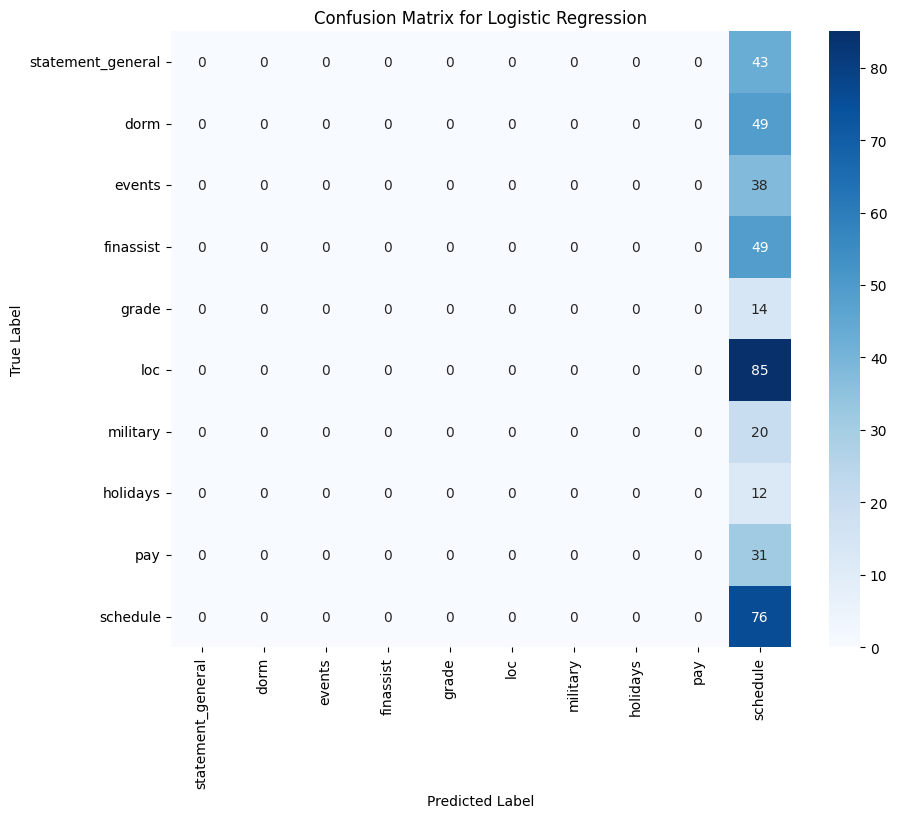



Evaluating Support Vector Machine
Classification Report for Support Vector Machine:
                   precision    recall  f1-score   support

statement_general       0.00      0.00      0.00        43
             dorm       0.00      0.00      0.00        49
           events       0.00      0.00      0.00        38
        finassist       0.00      0.00      0.00        49
            grade       0.00      0.00      0.00        14
              loc       0.00      0.00      0.00        85
         military       0.00      0.00      0.00        20
         holidays       0.00      0.00      0.00        12
              pay       0.00      0.00      0.00        31
         schedule       0.18      1.00      0.31        76

         accuracy                           0.18       417
        macro avg       0.02      0.10      0.03       417
     weighted avg       0.03      0.18      0.06       417



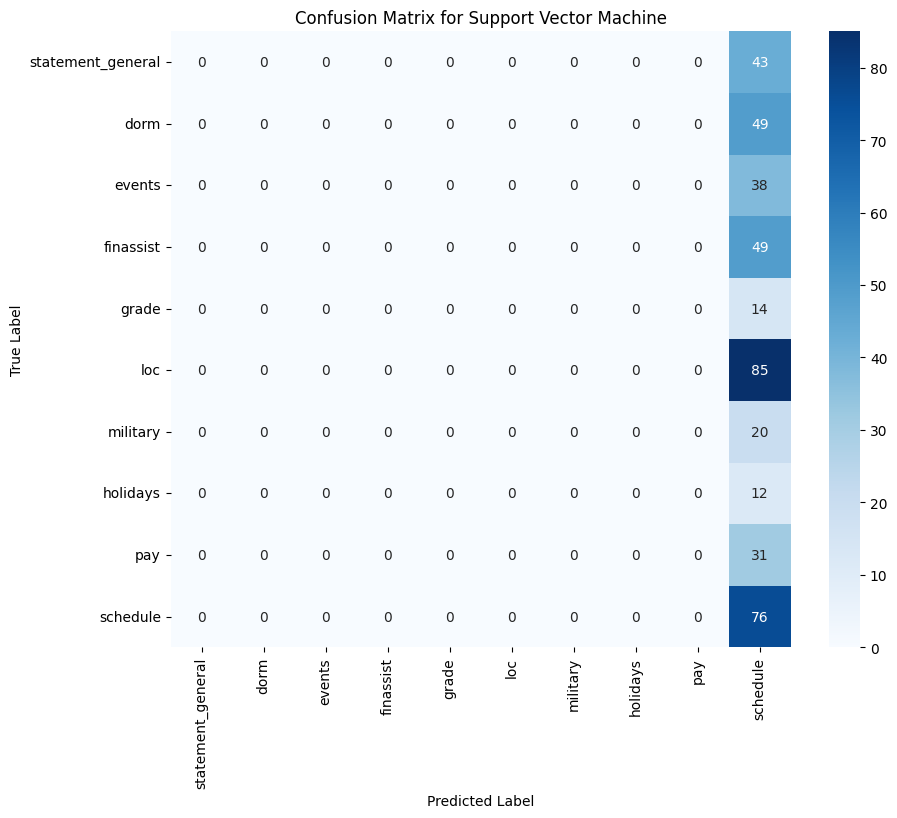



Evaluating Random Forest
Classification Report for Random Forest:
                   precision    recall  f1-score   support

statement_general       0.09      0.02      0.04        43
             dorm       0.23      0.06      0.10        49
           events       0.00      0.00      0.00        38
        finassist       0.04      0.02      0.03        49
            grade       0.00      0.00      0.00        14
              loc       0.20      0.26      0.22        85
         military       0.11      0.05      0.07        20
         holidays       0.00      0.00      0.00        12
              pay       0.00      0.00      0.00        31
         schedule       0.19      0.58      0.28        76

         accuracy                           0.17       417
        macro avg       0.09      0.10      0.07       417
     weighted avg       0.12      0.17      0.12       417



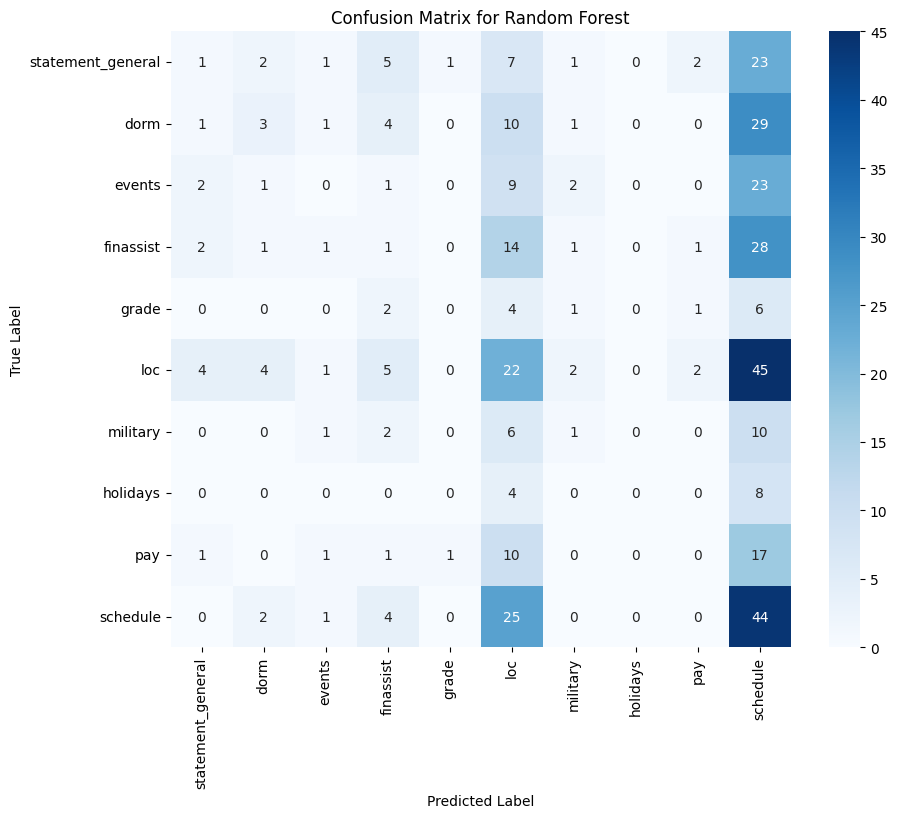



Evaluating MLP Classifier
Classification Report for MLP Classifier:
                   precision    recall  f1-score   support

statement_general       0.00      0.00      0.00        43
             dorm       0.00      0.00      0.00        49
           events       0.00      0.00      0.00        38
        finassist       0.00      0.00      0.00        49
            grade       0.00      0.00      0.00        14
              loc       0.20      0.04      0.06        85
         military       0.00      0.00      0.00        20
         holidays       0.00      0.00      0.00        12
              pay       0.00      0.00      0.00        31
         schedule       0.18      0.97      0.31        76

         accuracy                           0.18       417
        macro avg       0.04      0.10      0.04       417
     weighted avg       0.07      0.18      0.07       417



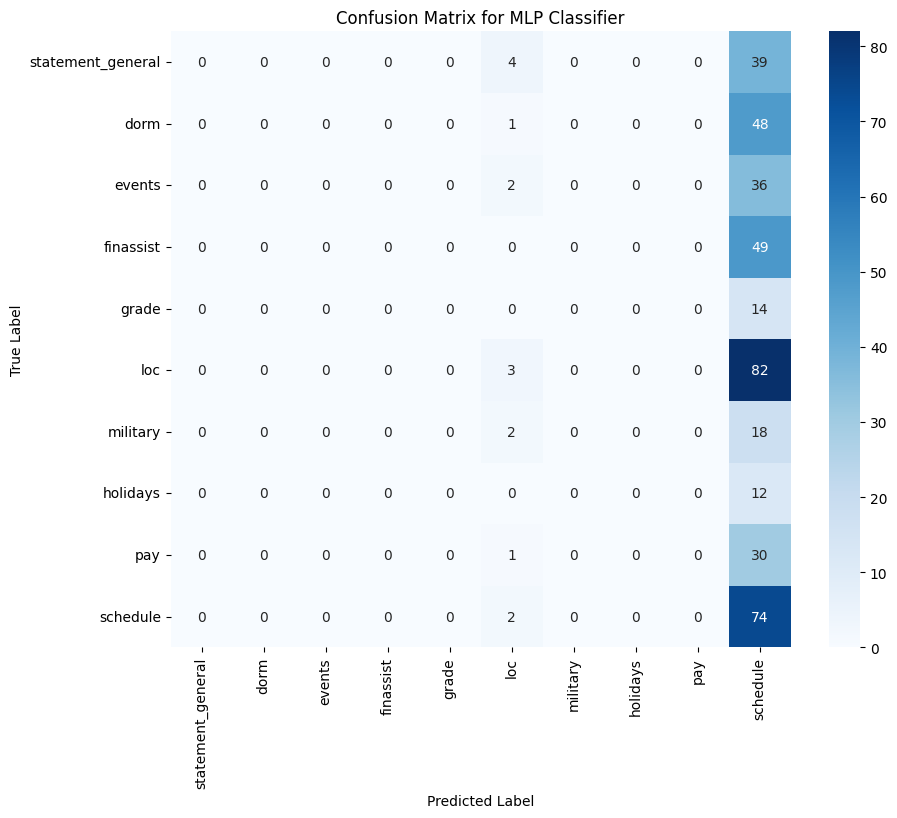

In [513]:

# Оценка всех моделей из списка
for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    print("\n")


In [514]:

# Создание и обучение нейронной сети с использованием Keras
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10 классов

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [515]:

nn_model = create_nn_model(X_train.shape[1])
nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Оценка нейронной сети
y_pred_nn = nn_model.predict(X_test)
y_pred_nn_classes = y_pred_nn.argmax(axis=1)


Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3196 - loss: 1.9925 - val_accuracy: 0.3733 - val_loss: 1.8388
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3528 - loss: 1.8375 - val_accuracy: 0.3717 - val_loss: 1.8281
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3642 - loss: 1.8351 - val_accuracy: 0.3490 - val_loss: 1.8263
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3710 - loss: 1.8008 - val_accuracy: 0.3425 - val_loss: 1.8287
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3497 - loss: 1.8304 - val_accuracy: 0.3741 - val_loss: 1.8162
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3663 - loss: 1.8078 - val_accuracy: 0.3733 - val_loss: 1.8159
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3646 - loss: 1.8154 - val_accuracy: 0.3733 - val_loss: 1.8198
Epoch 8/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3665 - loss: 1.8201 - val_accuracy: 0.

Classification Report for Neural Network:
                   precision    recall  f1-score   support

statement_general       0.00      0.00      0.00        43
             dorm       0.00      0.00      0.00        49
           events       0.00      0.00      0.00        38
        finassist       0.00      0.00      0.00        49
            grade       0.00      0.00      0.00        14
              loc       0.50      0.01      0.02        85
         military       0.00      0.00      0.00        20
         holidays       0.00      0.00      0.00        12
              pay       0.00      0.00      0.00        31
         schedule       0.18      1.00      0.31        76

         accuracy                           0.18       417
        macro avg       0.07      0.10      0.03       417
     weighted avg       0.14      0.18      0.06       417



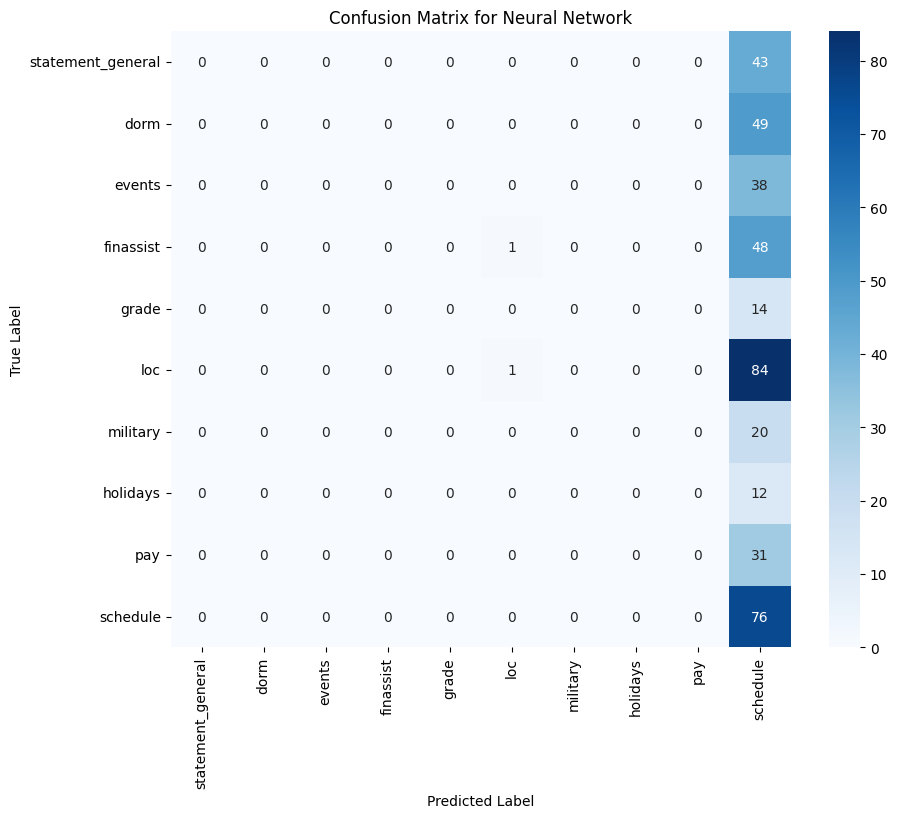

In [516]:
nn_class_report = classification_report(y_test, y_pred_nn_classes, target_names=LabelDict.values())
print("Classification Report for Neural Network:")
print(classification_report(y_test, y_pred_nn_classes, target_names=LabelDict.values()))
nn_report_filename = "Neural_Network_classification_report.txt"
with open(nn_report_filename, "w") as file:
    file.write(nn_class_report)

# Создание и визуализация матрицы путаницы для нейронной сети
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', xticklabels=LabelDict.values(), yticklabels=LabelDict.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Neural Network')

# Сохранение матрицы путаницы для нейронной сети как изображения
conf_matrix_nn_filename = "Neural_Network_confusion_matrix.png"
plt.savefig("P:\\MessageClassifier\\other\\" + conf_matrix_nn_filename)

plt.show()
